In [35]:
import joblib
import matplotlib.pyplot as plt
import numpy as np

import os
import glob
import re
import torch
from preprocessor import get_dataset

In [2]:
best_overall_params = {}

In [ ]:
best_val_loss = 1000
best_params = None

all_train_loss = []
all_val_loss = []
all_keys = []

best_val_loss = 1000
best_lora_lr = None

# Find all grid_results joblib files in the results folder
pattern = r'grid_results_\d+_[\d.e+-]+\.pt'

# Get all files in the results directory
result_files = glob.glob('../results/*')

# Filter files that match the pattern
result_files = [file for file in result_files if re.search(pattern, file)]
print(result_files)

# Display the content of each file
for file_path in result_files:
    # Load the joblib file
    result = torch.load(file_path, map_location=torch.device('cpu'))
    
    key = next(iter(result.keys()))
    # print(f"Key: {key}: ", result[key]['final_val_loss'])

    all_train_loss.append(result[key]['train_losses'])
    all_val_loss.append(result[key]['val_losses'])
    all_keys.append(key)
    
    # Check if the current file has the best validation loss
    if result[key]['final_val_loss'] < best_val_loss:
        best_val_loss = result[key]['final_val_loss']
        best_lora_lr = key

print(f"\n{'='*50}")
print(f"Best validation loss: {best_val_loss}")
print(f"Best file: {best_lora_lr}")
print(f"{'='*50}")

best_overall_params['lora_rank'] = best_lora_lr[0]
best_overall_params['learning_rate'] = best_lora_lr[1]

all_train_loss = np.array(all_train_loss)
all_val_loss = np.array(all_val_loss)
all_keys = np.array(all_keys)

fig, ax = plt.subplots()
for i in range(len(all_train_loss)):
    ax.plot(all_train_loss[i, :, 1], all_train_loss[i, :, 0], label=f"{all_keys[i]}")
plt.legend()
plt.show()

fig, ax = plt.subplots()
for i in range(len(all_val_loss)):
    ax.plot(all_val_loss[i, :, 1], all_val_loss[i, :, 0], label=f"{all_keys[i]}")
plt.legend()
plt.show()

['../results/grid_results_8_1e-05.pt', '../results/grid_results_8_5e-05.pt', '../results/grid_results_8_0.0001.pt', '../results/grid_results_4_1e-05.pt', '../results/grid_results_4_0.0001.pt', '../results/grid_results_2_0.0001.pt', '../results/grid_results_4_5e-05.pt', '../results/grid_results_2_1e-05.pt', '../results/grid_results_2_5e-05.pt']

Best validation loss: 0.6913253295421601
Best file: (8, 0.0001)


/tmp/ipykernel_107280/1053950333.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  result = torch.load(file_path, map_location=torch.device('cpu'))


In [ ]:
best_val_loss = 1000
best_params = None

all_train_loss = []
all_val_loss = []
all_keys = []

best_val_loss = 1000
best_ctx = None

# Pattern to match files of the form grid_results_NUMBER.joblib
pattern = r'grid_results_\d+\.pt'

# Get all files in the results directory
result_files = glob.glob('../results/*')

# Filter files that match the pattern (just one number after grid_results_)
result_files = [file for file in result_files if re.search(pattern, file)]

# print(result_files)

# Display the content of each file
for file_path in result_files:
    # Load the joblib file
    result = torch.load(file_path, map_location=torch.device('cpu'))
    
    key = next(iter(result.keys()))
    print(f"Key: {key}: ", result[key]['final_val_loss'])

    all_train_loss.append(result[key]['train_losses'])
    all_val_loss.append(result[key]['val_losses'])
    all_keys.append(key)
    
    # Check if the current file has the best validation loss
    if result[key]['final_val_loss'] < best_val_loss:
        best_val_loss = result[key]['final_val_loss']
        best_ctx = key

print(f"\n{'='*50}")
print(f"Best validation loss: {best_val_loss}")
print(f"Best file: {best_ctx}")
print(f"{'='*50}")

best_overall_params['max_ctx_length'] = best_ctx

all_train_loss = np.array(all_train_loss)
all_val_loss = np.array(all_val_loss)

fig, ax = plt.subplots()
for i in range(len(all_train_loss)):
    ax.plot(all_train_loss[i, :, 1], all_train_loss[i, :, 0], label=f"{all_keys[i]}")
plt.legend()
plt.show()

fig, ax = plt.subplots()
for i in range(len(all_val_loss)):
    ax.plot(all_val_loss[i, :, 1], all_val_loss[i, :, 0], label=f"{all_keys[i]}")
plt.legend()
plt.show()

Key: 768:  0.685956996679306
Key: 128:  0.9206420757770538
Key: 512:  0.6876444029808044

Best validation loss: 0.685956996679306
Best file: 768


/tmp/ipykernel_107280/4168715624.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  result = torch.load(file_path, map_location=torch.device('cpu'))


In [ ]:
best_val_loss = 1000
best_params = None

all_train_loss = []
all_val_loss = []
all_keys = []

best_val_loss = 1000
best_schedule = None

# Pattern to match files of the form grid_results_WORDS.joblib
pattern = r'grid_results_[a-zA-Z]+\.pt'

# Get all files in the results directory
result_files = glob.glob('../results/*')

# Filter files that match the pattern (just one number after grid_results_)
result_files = [file for file in result_files if re.search(pattern, file)]

# print(result_files)

# Display the content of each file
for file_path in result_files:
    # Load the joblib file
    result = torch.load(file_path, map_location=torch.device('cpu'))
    
    key = next(iter(result.keys()))
    # print(f"Key: {key}: ", result[key]['final_val_loss'])

    all_train_loss.append(result[key]['train_losses'])
    all_val_loss.append(result[key]['val_losses'])
    all_keys.append(key)
    
    # Check if the current file has the best validation loss
    if result[key]['final_val_loss'] < best_val_loss:
        best_val_loss = result[key]['final_val_loss']
        best_schedule = key

print(f"\n{'='*50}")
print(f"Best validation loss: {best_val_loss}")
print(f"Best file: {best_schedule}")
print(f"{'='*50}")

best_overall_params['scheduler_choice'] = best_schedule

all_train_loss = np.array(all_train_loss)
all_val_loss = np.array(all_val_loss)

fig, ax = plt.subplots()
for i in range(len(all_train_loss)):
    ax.plot(all_train_loss[i, :, 1], all_train_loss[i, :, 0], label=f"{all_keys[i]}")
plt.legend()
plt.show()

fig, ax = plt.subplots()
for i in range(len(all_val_loss)):
    ax.plot(all_val_loss[i, :, 1], all_val_loss[i, :, 0], label=f"{all_keys[i]}")
plt.legend()
plt.show()


Best validation loss: 1000
Best file: None


In [16]:
# joblib.dump(best_overall_params, "best_overall_params.joblib")

['../results/lora_run_CSD3_15k_seed_defaults.pt', '../results/lora_run_CSD3_default.pt']


/tmp/ipykernel_107280/2475488952.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  result = torch.load(file_path, map_location=torch.device('cpu'))


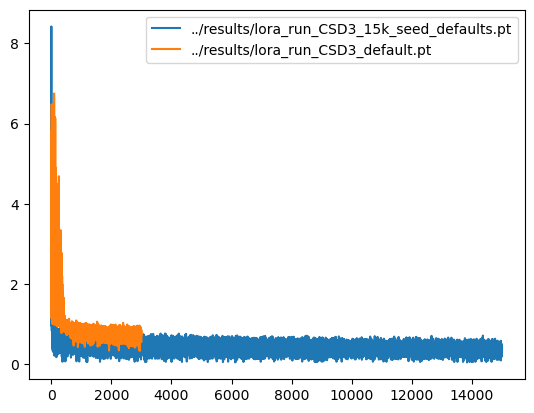

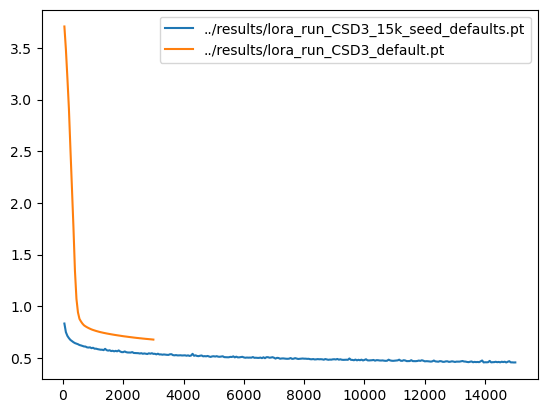

mean_prey_squared_error 0.0043201099999999985 0.27297646999999997 False
mean_prey_absolute_error 0.020949999999999993 0.16939 False
r2_prey_score 0.9860259814362329 0.44095842201960467 True
mean_predator_squared_error 0.004949109999999998 0.041723489999999995 False
mean_predator_absolute_error 0.025249999999999995 0.07186999999999999 False
r2_predator_score 0.9644386504548648 0.7351643768938148 True
running_mse_prey [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2345679012345702e-08, 6.097560975609767e-08, 8.313253012048209e-07, 1.0154761904761924e-05, 3.281176470588241e-05, 6.387209302325593e-05, 8.439080459770119e-05, 8.38409090909091

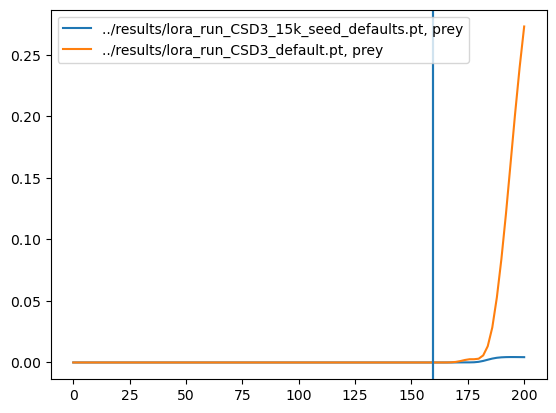

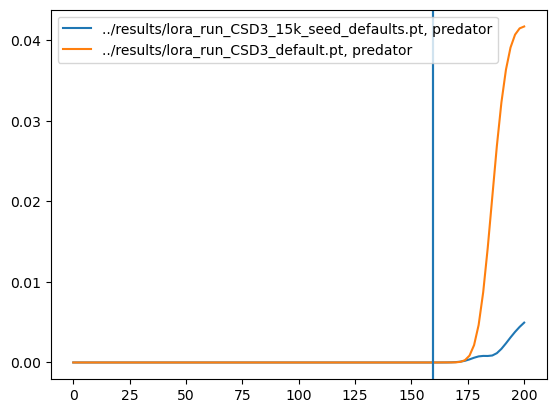

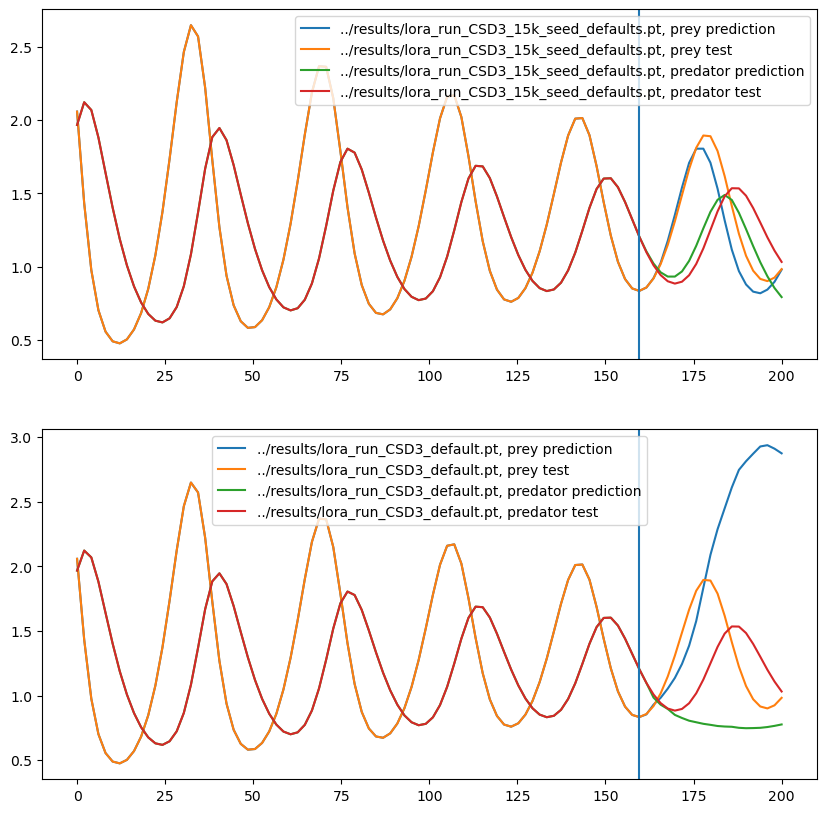

In [51]:
best_val_loss = 1000
best_params = None

all_train_loss = []
all_val_loss = []
all_keys = []
all_predictions = []
all_tests = []
all_metrics = []

best_val_loss = 1000
best_ctx = None

# Pattern to match files of the form grid_results_NUMBER.joblib
pattern = r'lora_run_CSD3_(.*default\.pt|.*seed_defaults\.pt)'

# Get all files in the results directory
result_files = glob.glob('../results/*')
# print(result_files)

# Filter files that match the pattern (just one number after grid_results_)
result_files = [file for file in result_files if re.search(pattern, file)]

print(result_files)

for file_path in result_files:
    # Load the joblib file

    result = torch.load(file_path, map_location=torch.device('cpu'))

    all_train_loss.append(result['train_losses'])
    all_val_loss.append(result['val_losses'])
    all_keys.append(file_path)
    all_predictions.append(result['prediction_decoded'])
    all_tests.append(result['test_decoded'])
    all_metrics.append(result['metrics'])

fig, ax = plt.subplots()
for i in range(len(all_train_loss)):
    ax.plot(all_train_loss[i][:, 1], all_train_loss[i][:, 0], label=f"{all_keys[i]}")
plt.legend()
plt.show()

fig, ax = plt.subplots()
for i in range(len(all_val_loss)):
    ax.plot(all_val_loss[i][:, 1], all_val_loss[i][:, 0], label=f"{all_keys[i]}")
plt.legend()
plt.show()

for metric in all_metrics[0]:
    print(metric, all_metrics[0][metric], all_metrics[1][metric], all_metrics[0][metric] > all_metrics[1][metric])

_, _, times = get_dataset()

fig, ax = plt.subplots()
for i in range(len(all_metrics)):
    ax.plot(times, all_metrics[i]['running_mse_prey'], label=f"{all_keys[i]}, prey")
    ax.axvline(times[79])
plt.legend()
plt.show()

fig, ax = plt.subplots()
for i in range(len(all_metrics)):
    ax.plot(times, all_metrics[i]['running_mse_predator'], label=f"{all_keys[i]}, predator")
    ax.axvline(times[79])
plt.legend()
plt.show()

fig, ax = plt.subplots(2, figsize=(10, 10))
for prediction, test, key, i in zip(all_predictions, all_tests, all_keys, range(2)):
    # print(prediction[0])
    ax[i].plot(times, prediction[0], label=f"{key}, prey prediction")
    ax[i].plot(times, test[0], label=f"{key}, prey test")
    ax[i].plot(times, prediction[1], label=f"{key}, predator prediction")
    ax[i].plot(times, test[1], label=f"{key}, predator test")
    ax[i].axvline(times[79])
    ax[i].legend()
# plt.legend()
plt.show()
